<a href="https://colab.research.google.com/github/rubaTech/employee-attrition-prediction/blob/main/%D9%85%D8%B4%D8%B1%D9%88%D8%B9_%D8%AA%D8%B9%D9%84%D9%85_%D8%A7%D9%84%D8%A7%D9%84%D9%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files




**1- Exploratory Data Analysis (EDA)**

In [2]:
uploaded = files.upload()
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()




Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

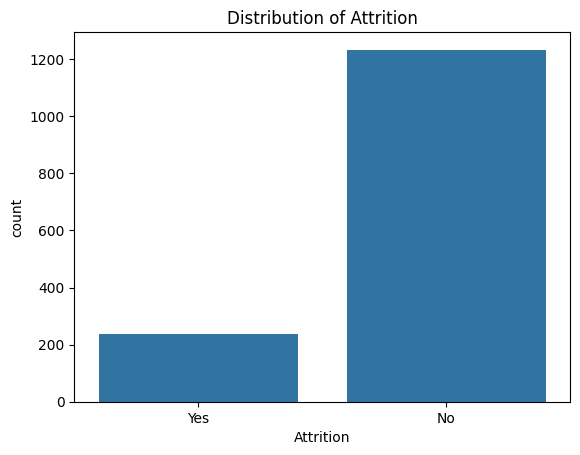

In [3]:

df.info()

df.describe()
df.isnull().sum()

df['Attrition'].value_counts()
sns.countplot(x='Attrition', data=df)
plt.title("Distribution of Attrition")
plt.show()

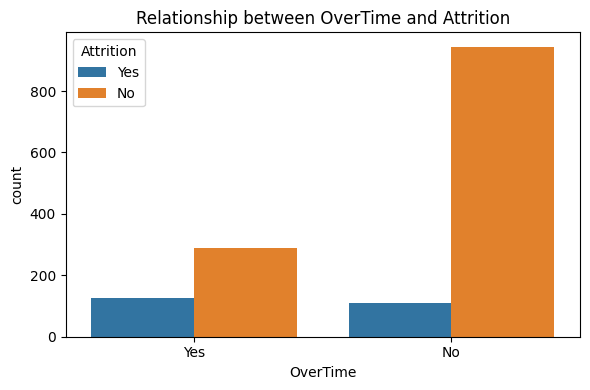

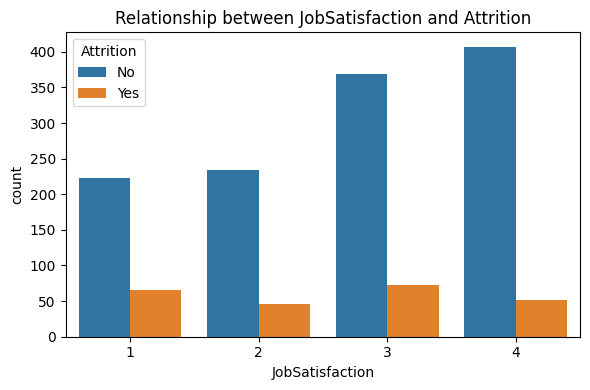

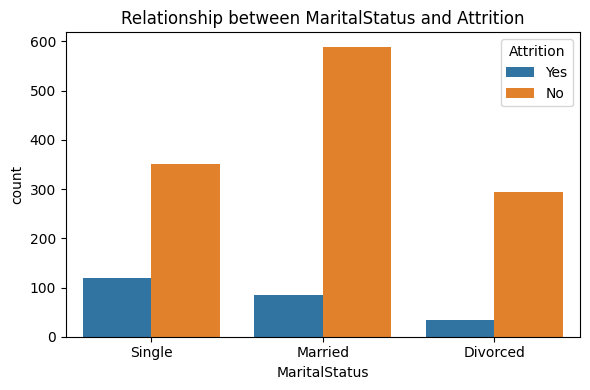

In [4]:
# Visualizing the relationship between selected features and employee attrition
cols = ['OverTime', 'JobSatisfaction', 'MaritalStatus']
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f"Relationship between {col} and Attrition")
    plt.tight_layout()
    plt.show()

**Data Preprocessing**

In [5]:

df = pd.read_csv("HR-Employee-Attrition.csv")  # Re-download the original version, I did this to solve the error



# Delete columns that do not add any information to the form.
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
# Convert all text columns to numeric columns using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

# Y = label
y = df_encoded['Attrition_Yes']

# X = features
X = df_encoded.drop(['Attrition_Yes'], axis=1)

from sklearn.model_selection import train_test_split

# Data split 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

save files in CSV format.

In [6]:
X_train.to_csv("X.csv", index=False)
y_train.to_csv("Y.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("Y_test.csv", index=False)

files.download("X.csv")
files.download("Y.csv")
files.download("X_test.csv")
files.download("Y_test.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Training**

Decision Tree Model Training

Decision Tree Accuracy: 0.7585034013605442
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.85      0.86       255
        True       0.15      0.18      0.16        39

    accuracy                           0.76       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.78      0.76      0.77       294



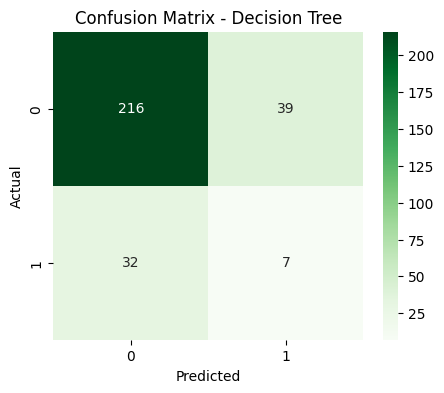

In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

#accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest model Training

Random Forest Accuracy: 0.8775510204081632
Classification Report:
               precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



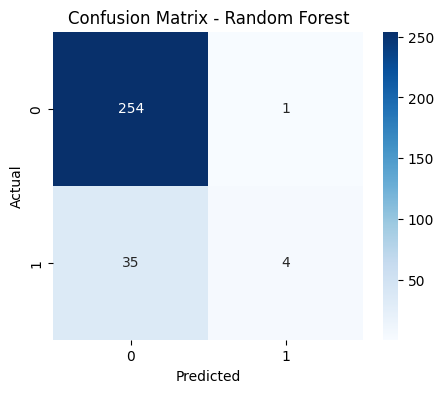

In [8]:
# model Training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

# accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 KNN (K-Nearest Neighbors) model training

In [9]:
#We re-standardize the measurements on the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


KNN Accuracy: 0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.99      0.94       255
        True       0.70      0.18      0.29        39

    accuracy                           0.88       294
   macro avg       0.79      0.58      0.61       294
weighted avg       0.86      0.88      0.85       294



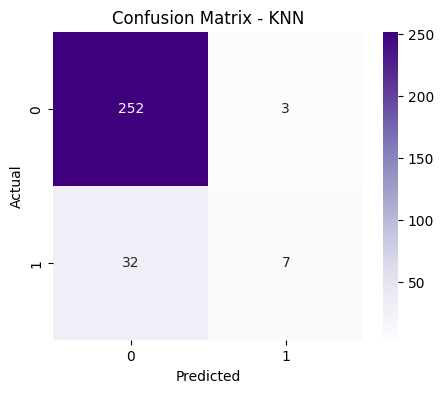

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


y_pred_knn = knn_model.predict(X_test_scaled)

# accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM ( Support Vector Machine)

SVM Accuracy: 0.8979591836734694
Classification Report:
               precision    recall  f1-score   support

       False       0.90      1.00      0.94       255
        True       0.91      0.26      0.40        39

    accuracy                           0.90       294
   macro avg       0.90      0.63      0.67       294
weighted avg       0.90      0.90      0.87       294



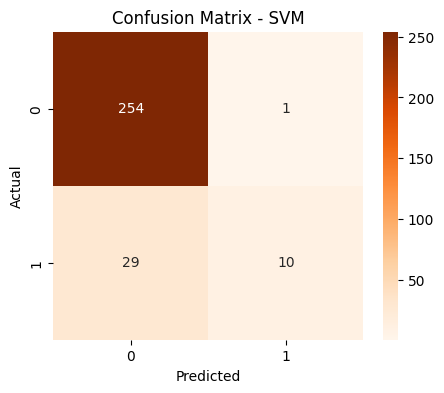

In [11]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)


y_pred_svm = svm_model.predict(X_test_scaled)

#accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes Model Training

Naive Bayes Accuracy: 0.7925170068027211
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.82      0.87       255
        True       0.34      0.62      0.44        39

    accuracy                           0.79       294
   macro avg       0.64      0.72      0.66       294
weighted avg       0.85      0.79      0.82       294



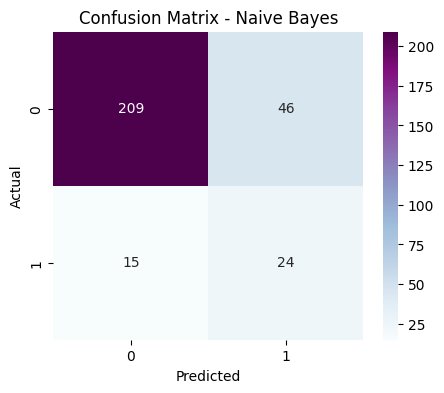

In [12]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


y_pred_nb = nb_model.predict(X_test)

# accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="BuPu")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ANN (Artificial Neural Network) Model Training

ANN Accuracy: 0.8469387755102041
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.92      0.91       255
        True       0.41      0.36      0.38        39

    accuracy                           0.85       294
   macro avg       0.66      0.64      0.65       294
weighted avg       0.84      0.85      0.84       294



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


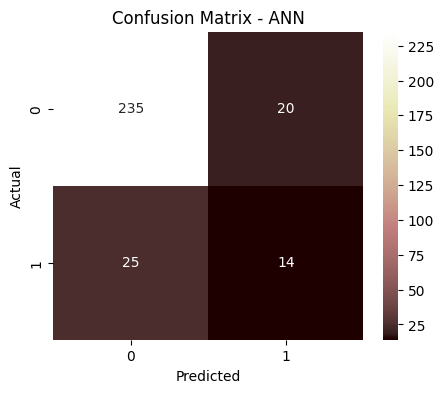

In [13]:
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
ann_model.fit(X_train_scaled, y_train)


y_pred_ann = ann_model.predict(X_test_scaled)

# accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)


print("Classification Report:\n", classification_report(y_test, y_pred_ann))

# confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(5,4))
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="pink")
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Linear Regression

Linear Regression Accuracy: 0.8741496598639455
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93       255
        True       0.58      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294



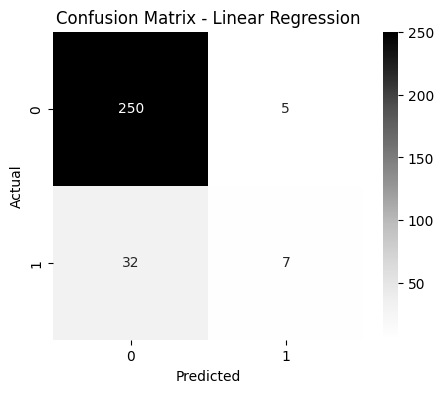

In [14]:
# Note:
# We included Linear Regression in the project as required
# but it's not the most appropriate model for classification problems like predicting employee attrition.
# Linear Regression predicts continuous values ( e,g :0.62 or 0.15)
# while our goal is to classify results into clear categories (Yes or No).
# So we had to manually convert the predictions into 0 or 1
# which can reduce accuracy and performance compared to models specifically designed for classification
# like SVM or Random Forest.

#---------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr_raw = lr_model.predict(X_test)

#We convert the results to 0 or 1
y_pred_lr = [1 if prob >= 0.5 else 0 for prob in y_pred_lr_raw]

# accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Linear Regression Accuracy:", accuracy_lr)


print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greys")
plt.title("Confusion Matrix - Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Note:

Although Linear Regression showed 87% accuracy its performance in detecting actual resignations was poor (f1 = 0.27) making it unreliable for our goal

# Model Comparison Based on F1-Score (Class 1 - Resigned Employees)

This chart compares the models based on the F1-score for class 1, which represents employees who actually resigned. Since the dataset is imbalanced     most employees didn’t resign relying only on accuracy would be misleading.

The F1-score for class 1 gives a more meaningful evaluation of how well each model detects actual resignations, by balancing precision and recall. This makes it the most appropriate metric for comparing models in our case, since the main goal is to identify employees at risk of leaving the company.

<ipython-input-15-1e1f3ec60597>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='F1_Score_Class_1', palette='viridis')


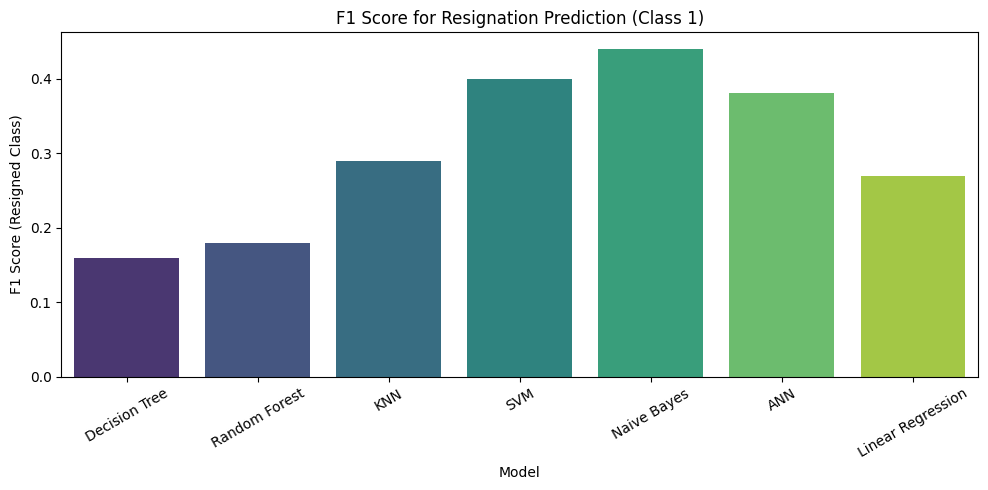

In [15]:
# Results data
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes', 'ANN', 'Linear Regression'],
    'Accuracy': [0.75, 0.87, 0.88, 0.89, 0.79, 0.84, 0.87],
    'F1_Score_Class_1': [0.16, 0.18, 0.29, 0.40, 0.44, 0.38, 0.27]
})


plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='F1_Score_Class_1', palette='viridis')

plt.title('F1 Score for Resignation Prediction (Class 1)')
plt.ylabel('F1 Score (Resigned Class)')
plt.xticks(rotation=30)
plt.tight_layout()




**Saving Model Predictions**

In [16]:

# Decision Tree
pd.DataFrame(y_pred_dt).to_csv("predictions_DT_model.csv", index=False)
files.download("predictions_DT_model.csv")


# Random Forest
pd.DataFrame(y_pred_rf).to_csv("predictions_RF_model.csv", index=False)
files.download("predictions_RF_model.csv")


# KNN
pd.DataFrame(y_pred_knn).to_csv("predictions_KNN_model.csv", index=False)
files.download("predictions_KNN_model.csv")


# SVM
pd.DataFrame(y_pred_svm).to_csv("predictions_SVM_model.csv", index=False)
files.download("predictions_SVM_model.csv")


# Naive Bayes
pd.DataFrame(y_pred_nb).to_csv("predictions_NB_model.csv", index=False)
files.download("predictions_NB_model.csv")


# ANN
pd.DataFrame(y_pred_ann).to_csv("predictions_ANN_model.csv", index=False)
files.download("predictions_ANN_model.csv")


# Linear Regression
pd.DataFrame(y_pred_lr).to_csv("predictions_LR_model.csv", index=False)
files.download("predictions_LR_model.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>